In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images into vectors
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Define the depths to test
depths = [3, 7, 10, 15, 20]

In [ ]:
# Initialize a dictionary to store the history objects returned by model.fit
history_dict = {}
test_accuracies = []
test_losses = []

for depth in depths:
    # Create a new model with the specified depth
    model = Sequential()
    model.add(Dense(64, input_shape=(784,), activation='relu'))
    for _ in range(depth - 1):  # We already added the first layer
        model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # Output layer

    # Print the depth and the number of layers in the model
    print(f'Depth: {depth}, Number of layers: {len(model.layers)}')

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model and store the history
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, verbose=0)
    history_dict[depth] = history

    # Evaluate the model on the test set and store the accuracy and loss
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    test_accuracies.append(accuracy)
    test_losses.append(loss)
    # Print the test accuracy and loss for this depth
    print(f'Test accuracy at depth {depth}: {accuracy}')
    print(f'Test loss at depth {depth}: {loss}')



Depth: 3, Number of layers: 4
Test accuracy at depth 3: 0.9753999710083008
Test loss at depth 3: 0.08658025413751602
Depth: 7, Number of layers: 8
Test accuracy at depth 7: 0.9695000052452087
Test loss at depth 7: 0.11585856974124908
Depth: 10, Number of layers: 11
Test accuracy at depth 10: 0.96670001745224
Test loss at depth 10: 0.13858672976493835
Depth: 15, Number of layers: 16
Test accuracy at depth 15: 0.9628999829292297
Test loss at depth 15: 0.16029950976371765
Depth: 20, Number of layers: 21
Test accuracy at depth 20: 0.9613999724388123
Test loss at depth 20: 0.1642923653125763


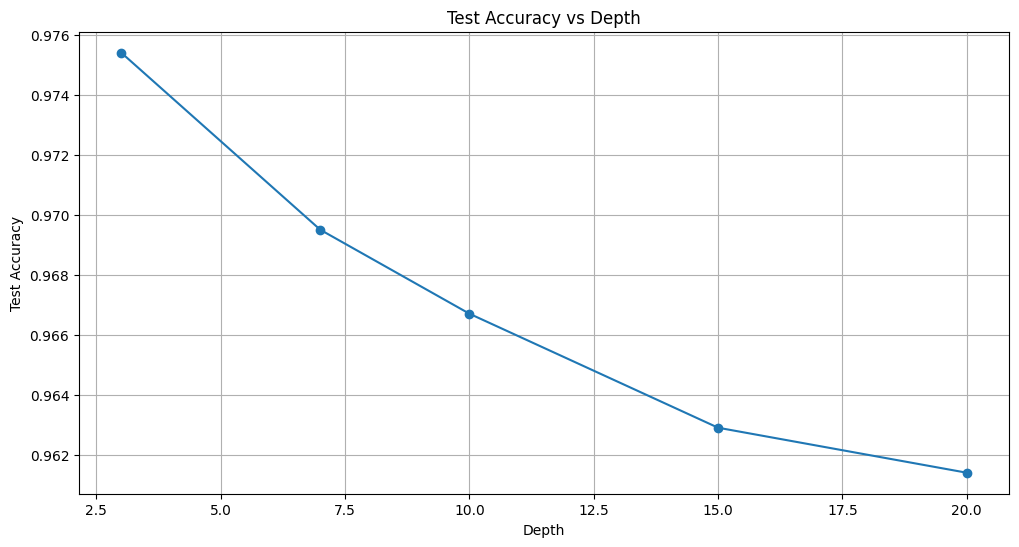

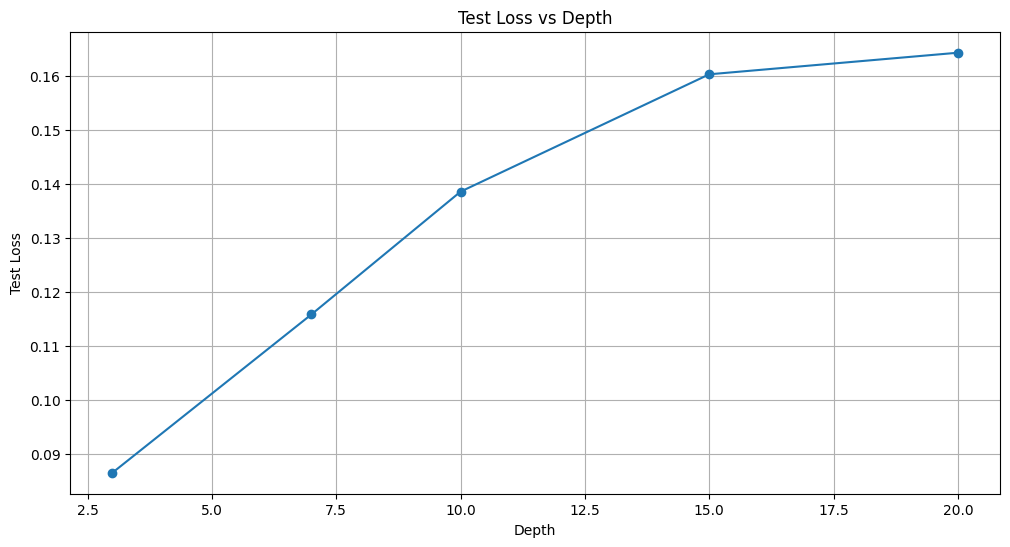

In [ ]:
# Plot the test accuracies against depth
plt.figure(figsize=(12, 6))
plt.plot(depths, test_accuracies, marker='o')
plt.title('Test Accuracy vs Depth')
plt.xlabel('Depth')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

# Plot the test losses against depth
plt.figure(figsize=(12, 6))
plt.plot(depths, test_losses, marker='o')
plt.title('Test Loss vs Depth')
plt.xlabel('Depth')
plt.ylabel('Test Loss')
plt.grid(True)
plt.show()